In [2]:
import pandas as pd 
import seaborn as sns
import os

In [3]:
os.chdir("/home/riccardodandrea/Schreibtisch/Github/ReutersNOZ")
os.getcwd()

'/home/riccardodandrea/Schreibtisch/Github/ReutersNOZ'

In [4]:
df = pd.read_csv("reuters_articles_with_split.csv")
df.head()

,topics,text,split
0,cocoa,Showers continued throughout the week in\nthe ...,TRAIN
1,NaN,Standard Oil Co and BP North America\nInc said...,TRAIN
2,NaN,Texas Commerce Bancshares Inc's Texas\nCommerc...,TRAIN
3,NaN,BankAmerica Corp is not under\npressure to act...,TRAIN
4,"grain,wheat,corn,barley,oat,sorghum",The U.S. Agriculture Department\nreported the ...,TRAIN


In [5]:
df.isna().sum()

topics    8666
text         0
split        0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isna().sum()

topics    0
text      0
split     0
dtype: int64

In [8]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df["text"].iloc[0]

'Showers continued throughout the week in\nthe Bahia cocoa zone, alleviating the drought since early\nJanuary and improving prospects for the coming temporao,\nalthough normal humidity levels have not been restored,\nComissaria Smith said in its weekly review.\n    The dry period means the temporao will be late this year.\n    Arrivals for the week ended February 22 were 155,221 bags\nof 60 kilos making a cumulative total for the season of 5.93\nmln against 5.81 at the same stage last year. Again it seems\nthat cocoa delivered earlier on consignment was included in the\narrivals figures.\n    Comissaria Smith said there is still some doubt as to how\nmuch old crop cocoa is still available as harvesting has\npractically come to an end. With total Bahia crop estimates\naround 6.4 mln bags and sales standing at almost 6.2 mln there\nare a few hundred thousand bags still in the hands of farmers,\nmiddlemen, exporters and processors.\n    There are doubts as to how much of this cocoa would 

In [10]:
#Settings
language="english"
sample_text=df["text"].iloc[0]
stop_words=set(stopwords.words(language))

In [11]:
print("")
tokenized_sent=sent_tokenize(sample_text)
print("Sentences", tokenized_sent)
print("Number of Sentences:",len(tokenized_sent))
print("")


Sentences ['Showers continued throughout the week in\nthe Bahia cocoa zone, alleviating the drought since early\nJanuary and improving prospects for the coming temporao,\nalthough normal humidity levels have not been restored,\nComissaria Smith said in its weekly review.', 'The dry period means the temporao will be late this year.', 'Arrivals for the week ended February 22 were 155,221 bags\nof 60 kilos making a cumulative total for the season of 5.93\nmln against 5.81 at the same stage last year.', 'Again it seems\nthat cocoa delivered earlier on consignment was included in the\narrivals figures.', 'Comissaria Smith said there is still some doubt as to how\nmuch old crop cocoa is still available as harvesting has\npractically come to an end.', 'With total Bahia crop estimates\naround 6.4 mln bags and sales standing at almost 6.2 mln there\nare a few hundred thousand bags still in the hands of farmers,\nmiddlemen, exporters and processors.', 'There are doubts as to how much of this co

In [12]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import pandas as pd

# Beispieltext aus DataFrame
sample_text = df["text"].iloc[0]

# Settings
language = "english"
stop_words = set(stopwords.words(language))

# Satz-Tokenisierung
tokenized_sent = sent_tokenize(sample_text)
print("Sentences:", tokenized_sent)
print("Number of Sentences:", len(tokenized_sent))

# Wort-Tokenisierung
filtered_tokens = word_tokenize(sample_text)
print("Tokens before stopword removal:", filtered_tokens)

# Entfernen von Stopwörtern
filtered_tokens1 = [word for word in filtered_tokens if word.lower() not in stop_words and word not in string.punctuation]

# Ergebnisse
print("Tokens without stopwords:", filtered_tokens1)


Sentences: ['Showers continued throughout the week in\nthe Bahia cocoa zone, alleviating the drought since early\nJanuary and improving prospects for the coming temporao,\nalthough normal humidity levels have not been restored,\nComissaria Smith said in its weekly review.', 'The dry period means the temporao will be late this year.', 'Arrivals for the week ended February 22 were 155,221 bags\nof 60 kilos making a cumulative total for the season of 5.93\nmln against 5.81 at the same stage last year.', 'Again it seems\nthat cocoa delivered earlier on consignment was included in the\narrivals figures.', 'Comissaria Smith said there is still some doubt as to how\nmuch old crop cocoa is still available as harvesting has\npractically come to an end.', 'With total Bahia crop estimates\naround 6.4 mln bags and sales standing at almost 6.2 mln there\nare a few hundred thousand bags still in the hands of farmers,\nmiddlemen, exporters and processors.', 'There are doubts as to how much of this co

and       23
,         20
.         20
at        20
the       17
          ..
ends       1
midday     1
27         1
Reuter     1
          1
Name: count, Length: 253, dtype: int64


/home/riccardodandrea/Schreibtisch/Github/ReutersNOZ/venv/lib64/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


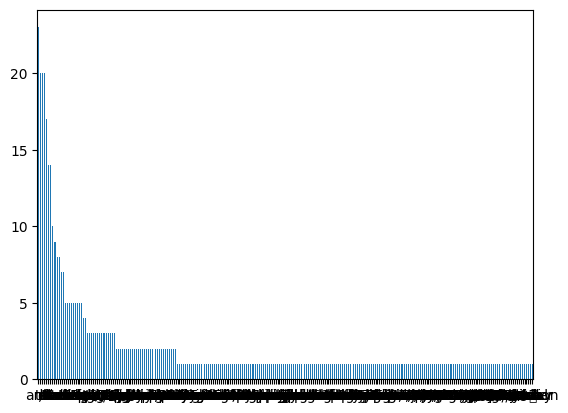

In [13]:
fa=pd.Series(filtered_tokens).value_counts()
print(fa.sort_values(ascending=False))
ax = fa.plot.bar(rot=0)
plt.show()

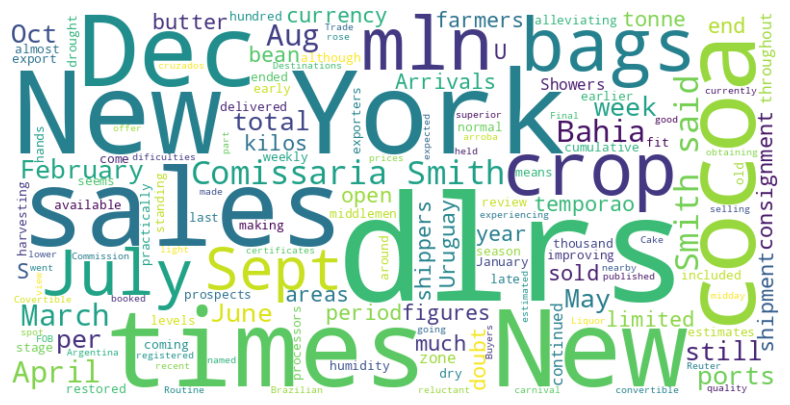

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Beispieltext aus DataFrame
sample_text = df["text"].iloc[0]

# Settings
language = "english"
stop_words = set(stopwords.words(language))

# Wort-Tokenisierung
tokens = word_tokenize(sample_text)

# Entfernen von Stopwörtern und Interpunktion
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]

# Füge die Wörter wieder zu einem Text zusammen
filtered_text = ' '.join(filtered_tokens)

# Erstellen der WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Plotten der WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Keine Achsen anzeigen
plt.show()


In [16]:
# create a list text
text = list(df['text'])
# preprocessing loop
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)


#assign corpus to data['text']
df['text'] = corpus

In [17]:
# Create Feature and Label sets
X = df['text']
y = df['topics']
# train test split (66% train - 33% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

Training Data : (8301,)
Testing Data :  (2076,)


In [18]:
# Train Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(8301, 21958)

In [19]:
# Training Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)
# transform X_test using CV
X_test_cv = cv.transform(X_test)
# generate predictions
predictions = lr.predict(X_test_cv)

predictions

/home/riccardodandrea/Schreibtisch/Github/ReutersNOZ/venv/lib64/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['cpi', 'acq', 'earn', ..., 'acq', 'trade', 'money-fx'],
      dtype=object)

In [20]:
list(df["topics"].unique())

['cocoa',
 'grain,wheat,corn,barley,oat,sorghum',
 'veg-oil,linseed,lin-oil,soy-oil,sun-oil,soybean,oilseed,corn,sunseed,grain,sorghum,wheat',
 'earn',
 'acq',
 'earn,acq',
 'wheat,grain',
 'copper',
 'housing',
 'coffee',
 'acq,ship',
 'sugar',
 'trade',
 'reserves',
 'ship',
 'grain,corn',
 'money-supply',
 'veg-oil,soybean,oilseed,meal-feed,soy-meal',
 'grain,wheat,corn,oat,rye,sorghum,soybean,oilseed',
 'cotton',
 'grain,ship',
 'carcass,livestock',
 'grain',
 'crude',
 'nat-gas',
 'cpi,gnp',
 'grain,wheat',
 'grain,corn,oat',
 'veg-oil,oilseed,meal-feed,soybean,soy-oil,soy-meal',
 'cpi',
 'money-fx,interest',
 'interest',
 'gnp,bop',
 'grain,rice',
 'soybean,red-bean,oilseed',
 'grain,wheat,rice,veg-oil,soybean,sugar,rubber,copra-cake,corn,palm-oil,palmkernel,coffee,tea,plywood,soy-meal,cotton',
 'money-fx',
 'meal-feed,copra-cake',
 'alum',
 'veg-oil,palm-oil',
 'tea,cocoa,coffee',
 'oilseed,soybean',
 'oilseed,soybean,meal-feed,soy-meal',
 'gold,platinum,strategic-metal',
 'meal

In [21]:
y_test.shape, predictions.shape

((2076,), (2076,))

In [22]:
df.columns

Index(['topics', 'text', 'split'], dtype='object')

In [23]:
# confusion matrix

import pandas as pd

from sklearn import metrics

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=list(df["topics"].unique()), columns=['topics', 'text', 'split'])

df

ValueError: Shape of passed values is (249, 249), indices imply (646, 3)